#01. Import Libraries

In [7]:
import tensorflow as tf#building and training neural networks.
#Submodules of Keras, an API in TensorFlow for building and training deep learning models. datasets provides access to datasets,
#layers provides various types of neural network layers, and models provides methods to create and train models.
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt #used for visualizing data
import numpy as np#use for numerical computations, providing support for arrays and matrices.

#02. Load and Preprocess the Data

In [8]:
# Load the CIFAR-10 dataset
#training images and their corresponding labels.
#test images and their corresponding labels.
#call loads the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for better visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#03. Create the CNN Model

In [9]:
#This creates a sequential model, which means that layers are added one after another in a linear stack.
model = models.Sequential([
    #Adds a 2D convolutional layer with 32 filters, each of size 3x3, Uses the ReLU activation function to introduce non-linearity.
    #Specifies the input shape of the images (32x32 pixels with 3 color channels).
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    #Adds a max pooling layer with a 2x2 window to reduce the spatial dimensions (height and width) by a factor of 2.
    layers.MaxPooling2D((2, 2)),
    #Adds another 2D convolutional layer with 64 filters of size 3x3 and ReLU activation.
    layers.Conv2D(64, (3, 3), activation='relu'),
    #Adds another max pooling layer with a 2x2 window.
    layers.MaxPooling2D((2, 2)),
    #Adds a third 2D convolutional layer with 64 filters of size 3x3 and ReLU activation.
    layers.Conv2D(64, (3, 3), activation='relu'),
    #Flattens the 3D output of the convolutional layers into a 1D vector to prepare it for the fully connected (dense) layers.
    layers.Flatten(),
    #Adds a dense layer with 64 neurons and ReLU activation.
    layers.Dense(64, activation='relu'),
    #Adds a dense output layer with 10 neurons (one for each class) and a softmax activation function.
    #The softmax function outputs a probability distribution over the 10 classes.
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',#Specifies the Adam optimizer, which is an adaptive learning rate optimization algorithm.
              #Uses sparse categorical cross-entropy loss function, suitable for classification tasks where labels are provided as integers.
              loss='sparse_categorical_crossentropy',
              #Specifies that the model should be evaluated using the accuracy metric.
              metrics=['accuracy'])
#Prints a summary of the model, including the layers, their output shapes, and the number of parameters.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#04. Train the Model

In [10]:
#Train the Model
#This method is used to train the model on the training data.
#The number of times the entire training dataset will be passed through the model. Here, the training process will run for 10 epochs.
history = model.fit(train_images, train_labels, epochs=10,
#A tuple containing the test images and their labels, used for validating the model's performance on unseen data at the end of each epoch.
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4946 - accuracy: 0.4569 - val_loss: 1.3156 - val_accuracy: 0.5368
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1515 - accuracy: 0.5939 - val_loss: 1.0533 - val_accuracy: 0.6226
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9990 - accuracy: 0.6486 - val_loss: 0.9409 - val_accuracy: 0.6681
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9098 - accuracy: 0.6803 - val_loss: 0.9639 - val_accuracy: 0.6705
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8376 - accuracy: 0.7076 - val_loss: 0.9154 - val_accuracy: 0.6797
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7812 - accuracy: 0.7277 - val_loss: 0.8694 - val_accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7290 - accuracy: 0.7459 - val_loss: 0.8600 - val_accuracy

#05. Evaluate the Model

In [11]:
#This method is used to evaluate the performance of the trained model on a given dataset.The input images for testing.
#The corresponding labels for the test images.The verbosity mode. 2 means that the evaluation process will output one line per epoch.
#The loss value of the model on the test dataset.test_acc: The accuracy of the model on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#Printing the Test Accuracy
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - loss: 0.9101 - accuracy: 0.6979 - 668ms/epoch - 2ms/step

Test accuracy: 0.6978999972343445


#06. Visualize the Classification Results

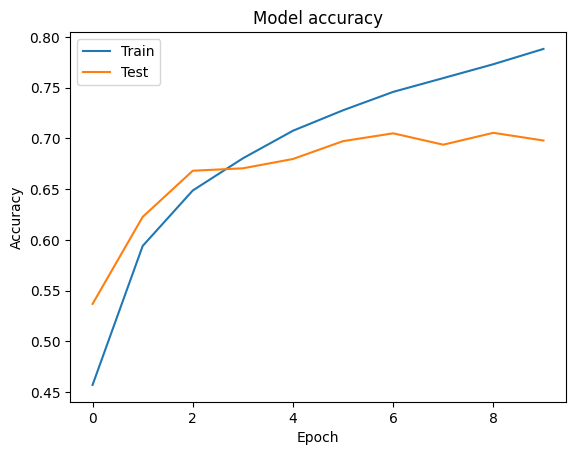

In [12]:
# Plot training & validation accuracy values
#This line plots the training accuracy values stored in the history object.history.
#history['accuracy'] is a list of accuracy values for each epoch during training.
plt.plot(history.history['accuracy'])
#This line plots the validation accuracy values stored in the history object.
#history.history['val_accuracy'] is a list of accuracy values for each epoch during validation.
plt.plot(history.history['val_accuracy'])
#This sets the title of the plot to "Model accuracy"
plt.title('Model accuracy')
#This sets the label for the Y-axis to "Accuracy".
plt.ylabel('Accuracy')
#This sets the label for the X-axis to "Epoch".
plt.xlabel('Epoch')
#This adds a legend to the plot. The legend entries are "Train" for the training accuracy and "Test" for the validation accuracy.
#loc='upper left' specifies the location of the legend in the upper left corner of the plot.
plt.legend(['Train', 'Test'], loc='upper left')
#This displays the plot.
plt.show()

#07. Plot training & validation loss values

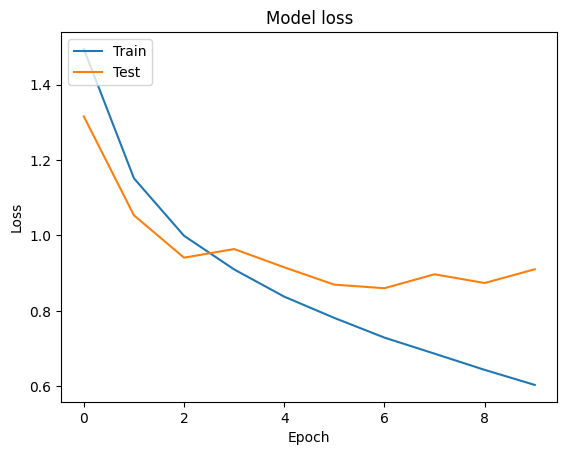

In [13]:
#This line plots the training loss values stored in the history object.
#history.history['loss'] is a list of loss values for each epoch during training.
plt.plot(history.history['loss'])
#This line plots the validation loss values stored in the history object.
#history.history['val_loss'] is a list of loss values for each epoch during validation.
plt.plot(history.history['val_loss'])
#This sets the title of the plot to "Model loss"
plt.title('Model loss')
#This sets the label for the Y-axis to "Loss".
plt.ylabel('Loss')
#This sets the label for the X-axis to "Epoch".
plt.xlabel('Epoch')
#This adds a legend to the plot. The legend entries are "Train" for the training loss and "Test" for the validation loss.
#loc='upper left' specifies the location of the legend in the upper left corner of the plot.
plt.legend(['Train', 'Test'], loc='upper left')
#This displays the plot.
plt.show()


#08. Visualize some predictions

In [14]:
#The predict method returns an array of predictions.
#model.predict(): This method is used to generate predictions from the model.
#test_images: The input images for which predictions are to be made. These images are part of the test dataset that was not used during training.

predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


#09. Plot the first 25 test images, their predicted labels, and the true labels.

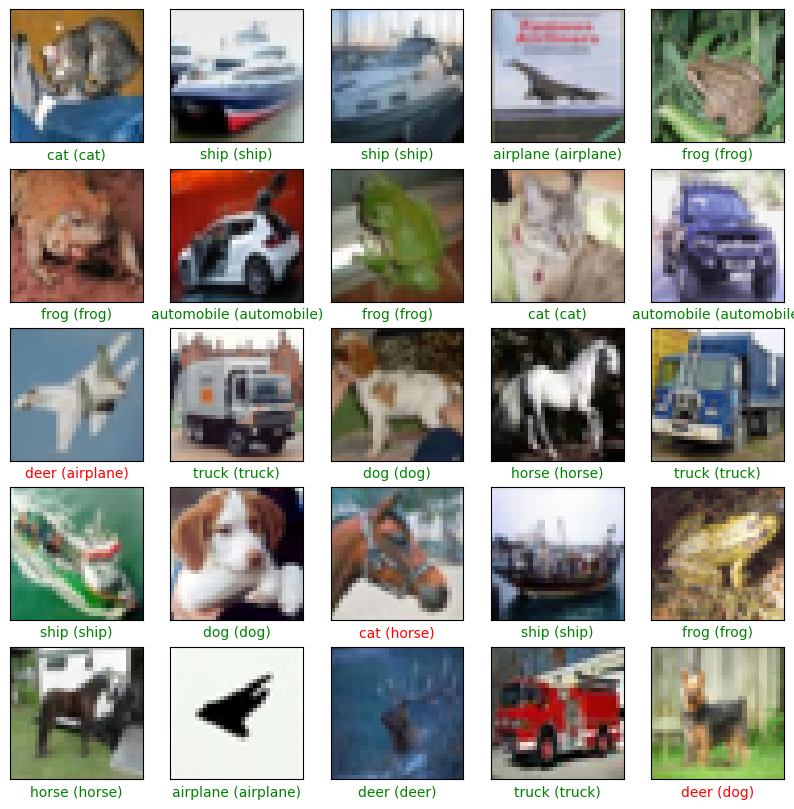

In [24]:
#This creates a new figure with a specified size of 10x10 inches for the plot.
plt.figure(figsize=(10,10))
#This loop iterates over the first 25 images in the test dataset.
for i in range(25):
  #This creates a subplot in a 5x5 grid for each image. The i+1 ensures that the subplots are filled from 1 to 25.
    plt.subplot(5,5,i+1)
  #These lines remove the x and y axis ticks for a cleaner look.
    plt.xticks([])
    plt.yticks([])
  #This removes the grid lines from the plot.
    plt.grid(False)
  #This displays the i-th test image. The cmap=plt.cm.binary parameter specifies that the image should be displayed in grayscale.
    plt.imshow(test_images[i], cmap=plt.cm.binary)
  #This gets the predicted label for the i-th image by finding the index with the highest probability in the prediction array.
    predicted_label = np.argmax(predictions[i])
  #This gets the true label for the i-th image. test_labels[i] is a list, so [0] extracts the label value.
    true_label = test_labels[i][0]
  #This sets the color to green if the prediction is correct and red if it is incorrect.
    color = 'green' if predicted_label == true_label else 'red'
  #This sets the x-axis label to show the predicted class name and the true class name, with the label color indicating the correctness of the prediction.
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
  #This displays the complete plot with all 25 subplots.
plt.show()